In [1]:
import pytearcat as pt
# Define the coordinates to be used
t,x,y,z = pt.coords('t,x,y,z')
# Define any constant (more than one constant can be defined at the same time)
c = pt.con('c')
Ax = pt.fun('Ax','t,x,y,z')
Ay = pt.fun('Ay','t,x,y,z')
Az = pt.fun('Az','t,x,y,z')
phi = pt.fun('phi','t,x,y,z')
g = pt.metric('ds2 = +dt**2 + -(dx**2 + dy**2 + dz**2)')

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = t,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[1,  0,  0,  0],
[0, -1,  0,  0],
[0,  0, -1,  0],
[0,  0,  0, -1]])

Elements assigned correctly to the components ^


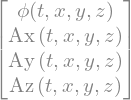

In [2]:
A = pt.ten('A',1)
A.assign([phi,Ax,Ay,Az],'^')
A.display('^')

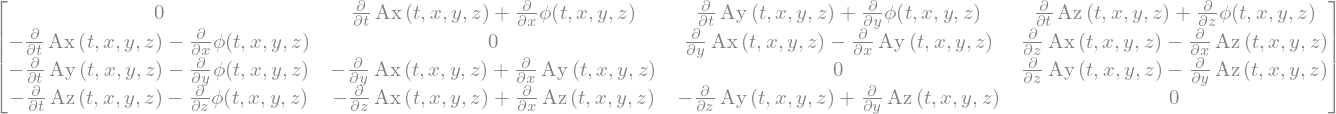

In [3]:
F = pt.ten('F',2)

F.assign(pt.D(A('^nu'),'^mu')-pt.D(A('^mu'),'^nu'),"^mu,^nu")

# One could also save the result of a tensor operation in a variable
# For example: F_value = pt.D(A('^nu'),'^mu')-pt.D(A('^mu'),'^nu')
# And then, to assing that value to the tensor: 
# F.assign(F_value,'^mu,^nu')

F.display('^,^')

In [4]:
F.indexcomb('^,^')

pt.display(pt.simplify(F("_mu,_nu")*F("^mu,^nu")))

F Tensor $F{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

F Tensor $F{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

F Tensor $F{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

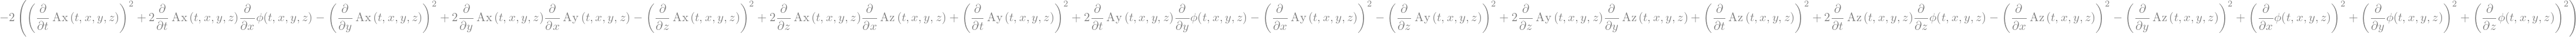

In [5]:
pt.factor(F("_mu,_nu")*F("^mu,^nu"))

This is the of the inner product of the electromagnetic tensor

$$F_{\mu\nu}F^{\mu\nu} = 2\left(B^2-E^2\right)$$

### PseudoScalar Invariant

In [6]:
LC = pt.lcivita(convention=-1)

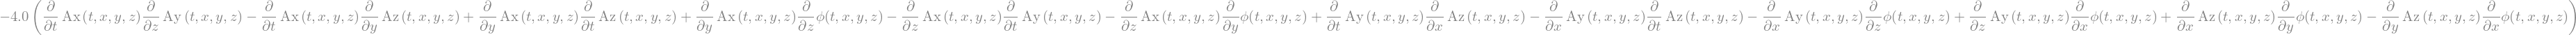

In [7]:
value = (1/2)*LC('_alpha,_beta,_gamma,_delta')*F('^alpha,^beta')*F('^gamma,^delta')

value.factor()

This gives $$-4\vec{B}\cdot\vec{E}$$

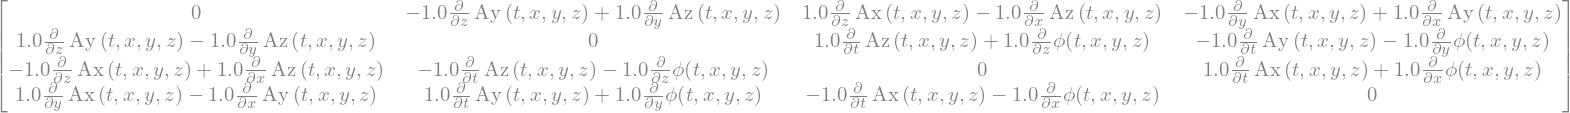

In [8]:
I2 = (1/2)*LC('^alpha,^beta,^gamma,^delta')*F('_gamma,_delta')

tensorG = pt.ten('tensorG',2)

tensorG.assign(I2,'^alpha,^beta')

tensorG.simplify()

tensorG.display('^,^')

## Relationship with the classic fields

Working with space coordinates only

In [9]:
pt.spacetime(False) # this function defines that the calculations will ignore the temporal component

In [10]:
LC = pt.lcivita(convention=1)

B = pt.ten('B',1)

B_dat = -(1/2)*LC('_i,_j,_k')*F('^j,^k')

B.assign(B_dat,'_i')

B.factor()

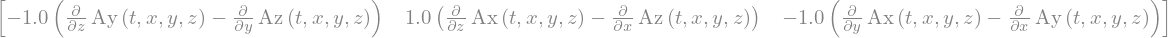

In [11]:
B.display()

In [12]:
KR = pt.kdelta()

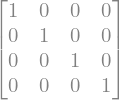

In [13]:
KR.display(spatial=False)

We return to work with the temporal component

In [14]:
pt.spacetime(True)

In [15]:
F('^i,^j')

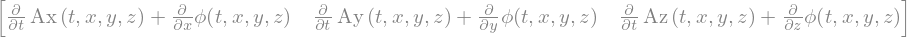

In [16]:
E = pt.ten('E',1)

lol = F('^0,^j')

E.assign(lol,'_j')

E.display("_",spatial=True)

## Bianchi Identity

In [17]:
BI = pt.ten('BI',3)

BI_dat = pt.D(F('_a,_b'),'_c') + pt.D(F('_b,_c'),'_a') + pt.D(F('_c,_a'),'_b')

BI.assign(BI_dat,'_a,_b,_c')

BI.factor()

BI.display()

All components are zero


## Maxwell's Equations

We can replace the elements of a tensor. For example, with arbitrary functions.

In [18]:
Ex = pt.fun('Ex','t,x,y,z')
Ey = pt.fun('Ey','t,x,y,z')
Ez = pt.fun('Ez','t,x,y,z')

Bx = pt.fun('Bx','t,x,y,z')
By = pt.fun('By','t,x,y,z')
Bz = pt.fun('Bz','t,x,y,z')

In [19]:
F_simplified = [[0,-Ex,-Ey,-Ez],[Ex,0,-Bz,By],[Ey,Bz,0,-Bx],[Ez,-By,Bx,0]]

Elements assigned correctly to the components ^,^


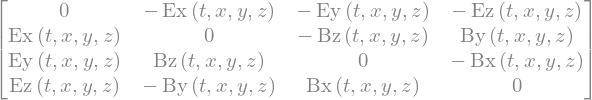

In [20]:
F.assign(F_simplified,'^,^')
F.display('^,^')

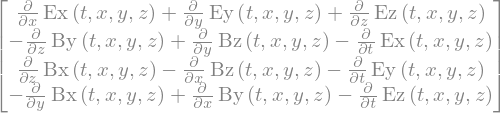

In [21]:
J_left = pt.ten('J',1)
J_dat_l = pt.D(F('^mu,^nu'),'_mu')

J_left.assign(J_dat_l,'^nu')

J_left.display('^')

This is consistent with 

In [22]:
rho = pt.fun('rho','t,x,y,z')

Jx = pt.fun('Jx','t,x,y,z')
Jy = pt.fun('Jy','t,x,y,z')
Jz = pt.fun('Jz','t,x,y,z')

Elements assigned correctly to the components ^


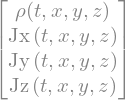

In [23]:
J_right = pt.ten('J',1)

J_dat_r = [rho,Jx,Jy,Jz]

J_right.assign(J_dat_r,'^')

J_right.display('^')

These are the Maxwell's Equations


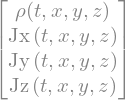

In [24]:
print("These are the Maxwell's Equations")

J_right.display('^')

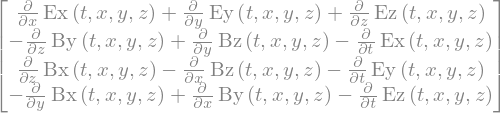

In [25]:
J_left.display('^')